In [206]:
'''
Patrick Ballou
ID: 801130521
ECGR 4105
Homework 2
Problem 1
'''

'\nPatrick Ballou\nID: 801130521\nECGR 4105\nHomework 2\nProblem 1\n'

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [208]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [209]:
#train/test split, random_state functions as seed
df_train, df_test = train_test_split(df, train_size=.8, test_size=.2, random_state=7)

In [210]:
#separate dataset into x and y, train and test
inputs = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

x_train = df_train[inputs]
Y_train = df_train['Outcome']

x_test = df_test[inputs]
Y_test = df_test['Outcome']

In [211]:
#standard scaler performs best
scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

In [212]:
#for loop finds best C value, which is the default in this case
'''
C = [10, 1, .1, .01, .001]

for c in C:
    classifier = LogisticRegression(random_state=7, C=c)
    classifier.fit(X_train, Y_train)
    print("C:", c)
    print("Training accuracy:", classifier.score(X_train, Y_train))
    print("Testing accuracy:", classifier.score(X_test, Y_test))

'''
classifier = LogisticRegression(random_state=7)
classifier.fit(X_train, Y_train)
    

LogisticRegression(random_state=7)

In [213]:
Y_pred = classifier.predict(X_test)

In [214]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[89,  8],
       [25, 32]], dtype=int64)

In [215]:
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.7857142857142857
Precision: 0.8
Recall: 0.5614035087719298


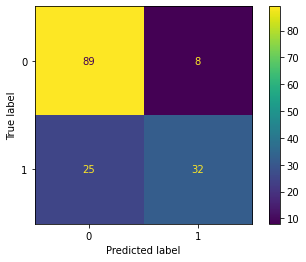

In [216]:
#not a great classifier
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=[0, 1])
cm_display.plot()